<a href="https://colab.research.google.com/github/ryzhokhina/Tensorflow-Dev-Exam-Preparation/blob/main/01_tensorflow_NN_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##01. Neural Network Regression with TensorFlow

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.12.0


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
X = np.linspace(-7.0, 14, 8)
y = np.linspace(3.0, 24, 8)

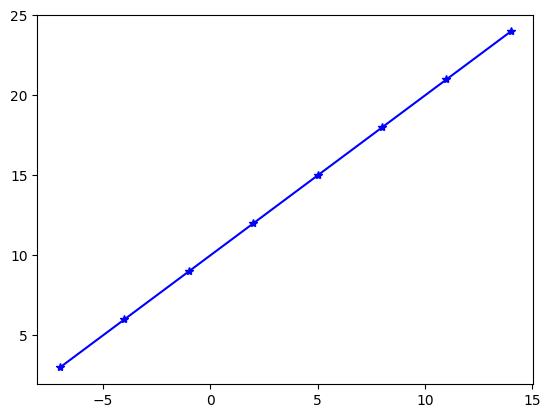

In [ ]:
plt.plot(X,y, '*-b')

In [ ]:
X = tf.constant(X)
y = tf.constant(y)

In [ ]:
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

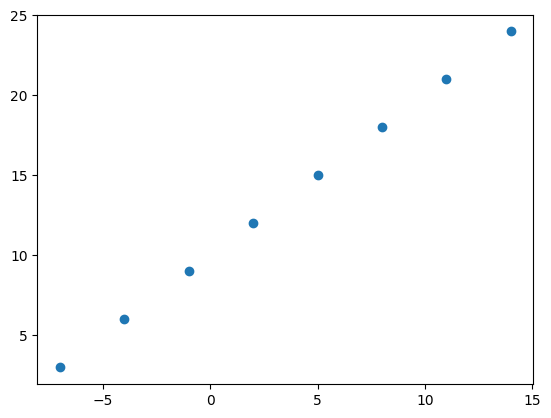

In [ ]:
plt.scatter(X,y)

# Creating model with TensorFlow


*   Create model
*   Compile model
*   Fit model
*   Evaluate model





In [ ]:
tf.random.set_seed(42)

model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1))
model.compile(optimizer = 'sgd', loss = tf.keras.losses.mse, metrics = 'mae')
model.fit(tf.expand_dims(X, -1), y, epochs = 10)

Epoch 1/10
1/1 [==============================] - 0s 392ms/step - loss: 80.1724 - mae: 7.5455
Epoch 2/10
1/1 [==============================] - 0s 11ms/step - loss: 77.0425 - mae: 7.8655
Epoch 3/10
1/1 [==============================] - 0s 11ms/step - loss: 74.6001 - mae: 7.6556
Epoch 4/10
1/1 [==============================] - 0s 10ms/step - loss: 72.2565 - mae: 7.5510
Epoch 5/10
1/1 [==============================] - 0s 10ms/step - loss: 69.9874 - mae: 7.4283
Epoch 6/10
1/1 [==============================] - 0s 9ms/step - loss: 67.7896 - mae: 7.3114
Epoch 7/10
1/1 [==============================] - 0s 9ms/step - loss: 65.6607 - mae: 7.1955
Epoch 8/10
1/1 [==============================] - 0s 9ms/step - loss: 63.5988 - mae: 7.0817
Epoch 9/10
1/1 [==============================] - 0s 9ms/step - loss: 61.6016 - mae: 6.9696
Epoch 10/10
1/1 [==============================] - 0s 10ms/step - loss: 59.6671 - mae: 6.8593


1/1 [==============================] - 0s 81ms/step


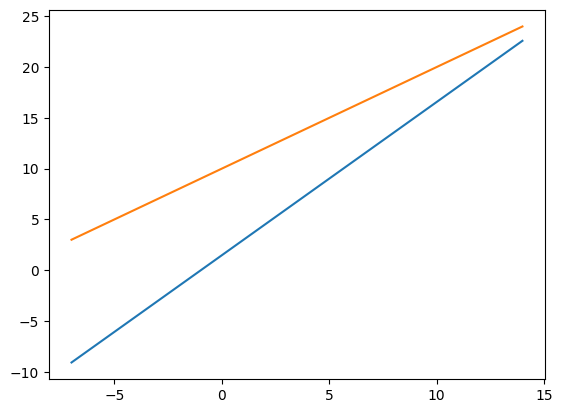

In [ ]:
y_predict = model.predict(X)
plt.plot(X, y_predict)
plt.plot(X,y)

### Improving model:
**1. creting model** : change layrs, change number of neurons, chanhe activation function

**2. compile model** : change optimizer, change lerning rate, change loss function
**3. fit model** : change number of data, change number of epochs

In [ ]:
tf.random.set_seed(42)
model_dif = tf.keras.Sequential((
  tf.keras.layers.Dense(50),
  tf.keras.layers.Dense(50),
  tf.keras.layers.Dense(50))
)
model_dif.add(tf.keras.layers.Dense(1))
model_dif.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01), loss = tf.keras.losses.mae, metrics = 'mae')
history = model_dif.fit(tf.expand_dims(X, -1), y, epochs = 100)

Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 14.8016 - mae: 14.8016
Epoch 2/100
1/1 [==============================] - 0s 11ms/step - loss: 9.9400 - mae: 9.9400
Epoch 3/100
1/1 [==============================] - 0s 11ms/step - loss: 8.6370 - mae: 8.6370
Epoch 4/100
1/1 [==============================] - 0s 11ms/step - loss: 7.4149 - mae: 7.4149
Epoch 5/100
1/1 [==============================] - 0s 10ms/step - loss: 8.3379 - mae: 8.3379
Epoch 6/100
1/1 [==============================] - 0s 17ms/step - loss: 8.4692 - mae: 8.4692
Epoch 7/100
1/1 [==============================] - 0s 13ms/step - loss: 7.3012 - mae: 7.3012
Epoch 8/100
1/1 [==============================] - 0s 11ms/step - loss: 6.8746 - mae: 6.8746
Epoch 9/100
1/1 [==============================] - 0s 11ms/step - loss: 7.5503 - mae: 7.5503
Epoch 10/100
1/1 [==============================] - 0s 10ms/step - loss: 6.6451 - mae: 6.6451
Epoch 11/100
1/1 [==============================] - 0s 9ms/step - los

1/1 [==============================] - 0s 64ms/step


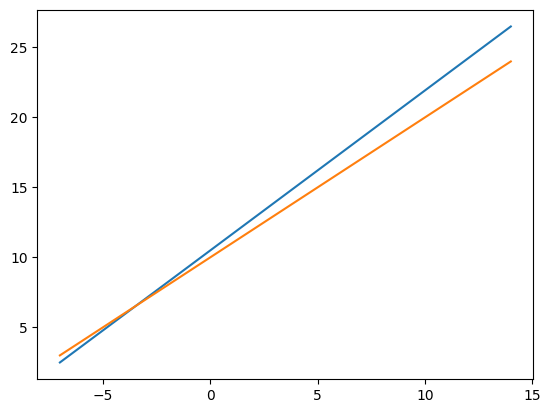

In [ ]:
plt.plot(X, model_dif.predict(X))
plt.plot(X,y)
plt.show()

In [ ]:
model_dif.predict(X)

1/1 [==============================] - 0s 29ms/step


array([[ 2.493699 ],
       [ 5.9229636],
       [ 9.352228 ],
       [12.781494 ],
       [16.210758 ],
       [19.640022 ],
       [23.069286 ],
       [26.49855  ]], dtype=float32)

In [ ]:
y

<tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>

In [ ]:
model.summary()

Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_105 (Dense)           (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_dif.summary()

Model: "sequential_31"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_110 (Dense)           (None, 50)                100       
                                                                 
 dense_111 (Dense)           (None, 50)                2550      
                                                                 
 dense_112 (Dense)           (None, 50)                2550      
                                                                 
 dense_113 (Dense)           (None, 1)                 51        
                                                                 
Total params: 5,251
Trainable params: 5,251
Non-trainable params: 0
_________________________________________________________________


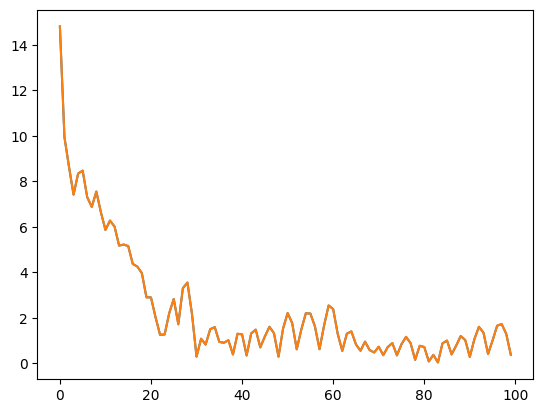

In [ ]:
import pandas as pd
plt.plot(pd.DataFrame(history.history))

In [ ]:
pd.DataFrame(history.history)

,loss,mae
0,14.801599,14.801599
1,9.940037,9.940037
2,8.637047,8.637047
3,7.414884,7.414884
4,8.337853,8.337853
...,...,...
95,1.008492,1.008492
96,1.655578,1.655578
97,1.728410,1.728410
98,1.294447,1.294447
